In [15]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [16]:
full_df = pd.read_csv('cardio_train.csv', sep=';')
full_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [17]:
full_df['age'] = round(full_df['age'] / 365)

In [18]:
x = full_df.iloc[::, [1, 5]]
y = full_df['cardio']

In [19]:
df = pd.DataFrame(x.copy())
df['cardio'] = y
df = df.head(10)

In [20]:
feature = ['age', 'ap_hi']
target = ['cardio']

In [21]:
model = DecisionTreeClassifier(random_state=1)
model.fit(df[feature], df[target])

DecisionTreeClassifier(random_state=1)

[Text(0.3333333333333333, 0.875, 'ap_hi <= 125.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.625, 'age <= 58.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.375, 'age <= 61.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

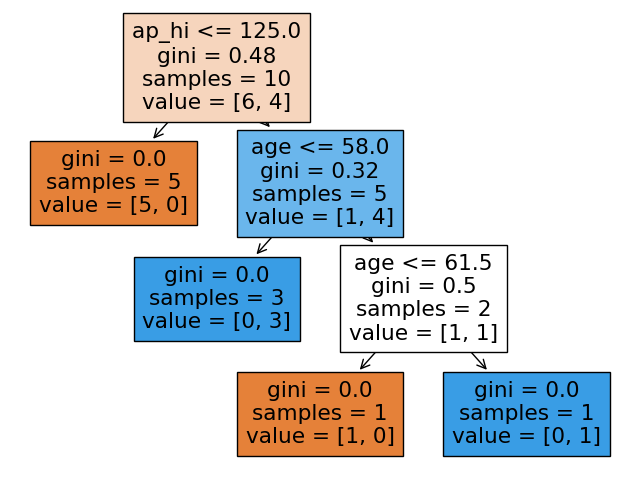

In [22]:
plt.figure(figsize=(8,6))
plot_tree(model, feature_names=feature, filled=True)

In [77]:
def split_data(full_df, df, value):
    
    left  = (full_df[df <= value])
    right = (full_df[~(df <= value)])
    
    return left, right 

def probability(df):
    
    class_0 = (df == 0).sum()
    class_1 = (df == 1).sum()
   
    total = class_0 + class_1
    
    c0 = class_0 / total
    c1 = class_1 / total    
    
    return c0, c1


def entropy(p_0, p_1):
    if 0 in [p_0, p_1]:
        return 0
    else:
        return -(p_0 * np.log2(p_0) + p_1 * np.log2(p_1))


def entroty_start(df, df_1, df_2, start, left, right):
    return start - df_1.shape[0] / df.shape[0] * left - df_2.shape[0] / df.shape[0] * right



def main(full_df, df, target, ent_start):
    
    
    start = []

    for i in df:
        
        a, b = split_data(full_df, df, i)
    
        p0, p1 = probability(a[target])
        p_0, p_1 = probability(b[target])
    
        ent_0 = entropy(p0, p1)
        ent_1 = entropy(p_0, p_1)
    
        start_ent = entroty_start(df, a, b, ent, ent_0, ent_1)
        start.append(start_ent)


    return start

In [62]:
start = probability(df['cardio'])
start

(0.6, 0.4)

In [63]:
ent = entropy(start[0], start[1])
ent

0.9709505944546686

In [73]:
ap_hi_ent = main(df, df['ap_hi'], 'cardio', ent)

C:\Users\playn\AppData\Local\Temp\ipykernel_6268\1600064714.py:15: RuntimeWarning: invalid value encountered in double_scalars
  c0 = logsumexp(class_0) / total
C:\Users\playn\AppData\Local\Temp\ipykernel_6268\1600064714.py:16: RuntimeWarning: invalid value encountered in double_scalars
  c1 = logsumexp(class_1) / total


In [74]:
age_ent = main(df, df['age'], 'cardio', ent)

C:\Users\playn\AppData\Local\Temp\ipykernel_6268\1600064714.py:15: RuntimeWarning: invalid value encountered in double_scalars
  c0 = logsumexp(class_0) / total
C:\Users\playn\AppData\Local\Temp\ipykernel_6268\1600064714.py:16: RuntimeWarning: invalid value encountered in double_scalars
  c1 = logsumexp(class_1) / total


In [75]:
print(max(ap_hi_ent))

0.6099865470109874


In [76]:
print(max(age_ent))

0.1444843438056279


In [96]:
start = []
count = 0
for i in df['ap_hi']:
    a, b = split_data(df, df['ap_hi'], i)
    count += 1
    
    p0, p1 = probability(a['cardio'])
    p_0, p_1 = probability(b['cardio'])
    
    ent_0 = entropy(p0, p1)
    ent_1 = entropy(p_0, p_1)
    
    
    start_ent = entroty_start(df, a, b, ent, ent_0, ent_1)
    start.append(start_ent)


df['ent'] = start

C:\Users\playn\AppData\Local\Temp\ipykernel_5316\1524143639.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  return class_0 / df.shape[0], class_1 / df.shape[0]


In [97]:
df['ent'] = df['ent'].fillna(0)

In [98]:
df

,age,ap_hi,cardio,ent
0,50.0,110,0,0.419973
1,55.0,140,1,0.144484
2,52.0,130,1,0.321928
3,48.0,150,1,0.000000
4,48.0,100,0,0.078982
5,60.0,120,0,0.609987
6,61.0,130,0,0.321928
7,62.0,130,1,0.321928
8,48.0,110,0,0.419973
9,54.0,110,0,0.419973


In [136]:
test0, test1 = split_data(df, df['ap_hi'], 120)

P0, P1 = probability(test0['cardio'])
P_0, P_1 = probability(test1['cardio'])

e0 = entropy(P0, P1)
e1 = entropy(P_0, P_1)

ent_s = entroty_start(df, test0, test1, ent, e0, e1)

In [134]:
M = np.max(df['ent'])

In [135]:
df[df['ent'] == M]

,age,ap_hi,cardio,ent
5,60.0,120,0,0.609987


In [137]:
test0

,age,ap_hi,cardio,ent
0,50.0,110,0,0.419973
4,48.0,100,0,0.078982
5,60.0,120,0,0.609987
8,48.0,110,0,0.419973
9,54.0,110,0,0.419973


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [136]:
full_data = pd.read_csv('balance-scale.csv')

full_data.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [117]:
full_data.iloc[::, 0].unique()

array(['B', 'R', 'L'], dtype=object)

In [145]:
x = full_data.iloc[::, [1,2,3,4]]
y = full_data.iloc[::, [0]]

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=41)

In [149]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [158]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
y_proba = model.predict_proba(x_test)

In [159]:
print(metrics.accuracy_score(y_test, y_pred_test))

0.776


In [160]:
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [163]:
sum(model.feature_importances_)

1.0

In [162]:
model.feature_names_in_

array(['Left weight', 'Left distance', 'Right weight', 'Right distance'],
      dtype=object)

----------

In [74]:
class DecisionTree_D:
    
    def split_data(self, full_df, df, value):
    
        left  = (full_df[df <= value])
        right = (full_df[~(df <= value)])
    
        return left, right 

    def probability(self, df):
    
        class_0 = (df == 0).sum()
        class_1 = (df == 1).sum()
   
        total = class_0 + class_1
    
        c0 = class_0 / total
        c1 = class_1 / total    
    
        return c0, c1


    def entropy(self, p_0, p_1):
        if 0 in [p_0, p_1]:
            return 0
        else:
            return -(p_0 * np.log2(p_0) + p_1 * np.log2(p_1))


    def entroty_start(self, df, df_1, df_2, start, left, right):
        return start - df_1.shape[0] / df.shape[0] * left - df_2.shape[0] / df.shape[0] * right



    def main(self, full_df, df, target, ent_start):
    
    
        start = []

        for i in df:
        
            a, b = self.split_data(full_df, df, i)
    
            p0, p1 = self.probability(a[target])
            p_0, p_1 = self.probability(b[target])
    
            ent_0 = self.entropy(p0, p1)
            ent_1 = self.entropy(p_0, p_1)
    
            start_ent = self.entroty_start(df, a, b, ent, ent_0, ent_1)
            start.append(start_ent)


        return start

In [75]:
D = DecisionTree_D()

p_0, p_1 = D.probability(data['y'])
ent = D.entropy(p_0, p_1)

ent

0.9871377743721863

In [76]:
res = D.main(data, data['x'], 'y', ent)

C:\Users\playn\AppData\Local\Temp\ipykernel_13788\2246070258.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  c0 = class_0 / total
C:\Users\playn\AppData\Local\Temp\ipykernel_13788\2246070258.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
  c1 = class_1 / total


In [77]:
res

[0.015004326992558437,
 0.0032427690512640273,
 0.02794669027667318,
 0.0005446358087919378,
 0.08345988684807149,
 0.03444514522829112,
 0.05902185160393114,
 5.829313567040639e-05,
 0.0032666611540337342,
 0.008328436232828584,
 0.0005446358087918823,
 0.0036665518424276455,
 0.008328436232828529,
 0.017701032519957846,
 0.0009248474068849211,
 0.01279445334017043,
 0.005350469383108125,
 0.0016379402287579614,
 0.05713329004251544,
 0.026707474628622108,
 0.01618717991751767,
 nan,
 0.0017857818694213545,
 2.028581074495217e-05,
 0.04589563368447616,
 0.041303422745854634,
 0.01600356597069974,
 0.00333973711233726,
 0.03746360784975089,
 0.084960383993957]

In [78]:
data['ent'] = res
data['ent'] = data['ent'].fillna(0)

In [68]:
data['ent'].max()

0.084960383993957

---------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
x, y = datasets.load_breast_cancer(return_X_y=True)

In [3]:
x = x[::, [0, 1]]

In [4]:
df = pd.DataFrame(x, columns=['x0', 'x1'])
df['y'] = y

In [5]:
df.head()

,x0,x1,y
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

print(x_train.shape, x_test.shape)

(341, 2) (228, 2)


In [29]:
model = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(x_test, y_test)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [30]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print(f'test: {metrics.accuracy_score(y_test, y_pred_test)}')
print(f'train: {metrics.accuracy_score(y_train, y_pred_train)}')

test: 0.9429824561403509
train: 0.8856304985337243


In [31]:
matrix = metrics.confusion_matrix(y_test, y_pred_test)
matrix

array([[ 75,   5],
       [  8, 140]], dtype=int64)

In [10]:
TP = matrix[1][1]
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]

In [11]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Preccision  = TP / (TP + FP)
Recal = TP / (TP + FN)
F1 = 2 * (Preccision * Recal) / (Preccision + Recal)

print(f'Accuracy : {Accuracy:.2f}', f'Accuracy_sk: {metrics.accuracy_score(y_test, y_pred_test):.2f}')
print(f'Preccision: {Preccision:.2f}', f'Preccision_sk: {metrics.precision_score(y_test, y_pred_test):.2f}')
print(f'Recal: {Recal:.2f}', f'Recal_sk: {metrics.recall_score(y_test, y_pred_test):.2f}')
print(f'F1: {F1:.2f}', f'F1_sk {metrics.f1_score(y_test, y_pred_test):.2f}')

Accuracy : 0.87 Accuracy_sk: 0.87
Preccision: 0.93 Preccision_sk: 0.93
Recal: 0.86 Recal_sk: 0.86
F1: 0.90 F1_sk 0.90


In [12]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        80
           1       0.93      0.86      0.90       148

    accuracy                           0.87       228
   macro avg       0.85      0.87      0.86       228
weighted avg       0.87      0.87      0.87       228



In [13]:
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       132
           1       0.94      0.89      0.92       209

    accuracy                           0.90       341
   macro avg       0.89      0.90      0.90       341
weighted avg       0.90      0.90      0.90       341



[Text(0.5, 0.875, 'x0 <= 15.02\ngini = 0.475\nsamples = 341\nvalue = [132, 209]'),
 Text(0.25, 0.625, 'x1 <= 19.61\ngini = 0.254\nsamples = 234\nvalue = [35, 199]'),
 Text(0.125, 0.375, 'x1 <= 15.53\ngini = 0.098\nsamples = 155\nvalue = [8, 147]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 57\nvalue = [0, 57]'),
 Text(0.1875, 0.125, 'gini = 0.15\nsamples = 98\nvalue = [8, 90]'),
 Text(0.375, 0.375, 'x0 <= 12.305\ngini = 0.45\nsamples = 79\nvalue = [27, 52]'),
 Text(0.3125, 0.125, 'gini = 0.114\nsamples = 33\nvalue = [2, 31]'),
 Text(0.4375, 0.125, 'gini = 0.496\nsamples = 46\nvalue = [25, 21]'),
 Text(0.75, 0.625, 'x1 <= 16.535\ngini = 0.169\nsamples = 107\nvalue = [97, 10]'),
 Text(0.625, 0.375, 'x0 <= 18.52\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.5625, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.875, 0.375, 'x0 <= 16.925\ngini = 0.041\nsamples = 95\nvalue = [93, 2]'),
 Text(0.8125, 0.12

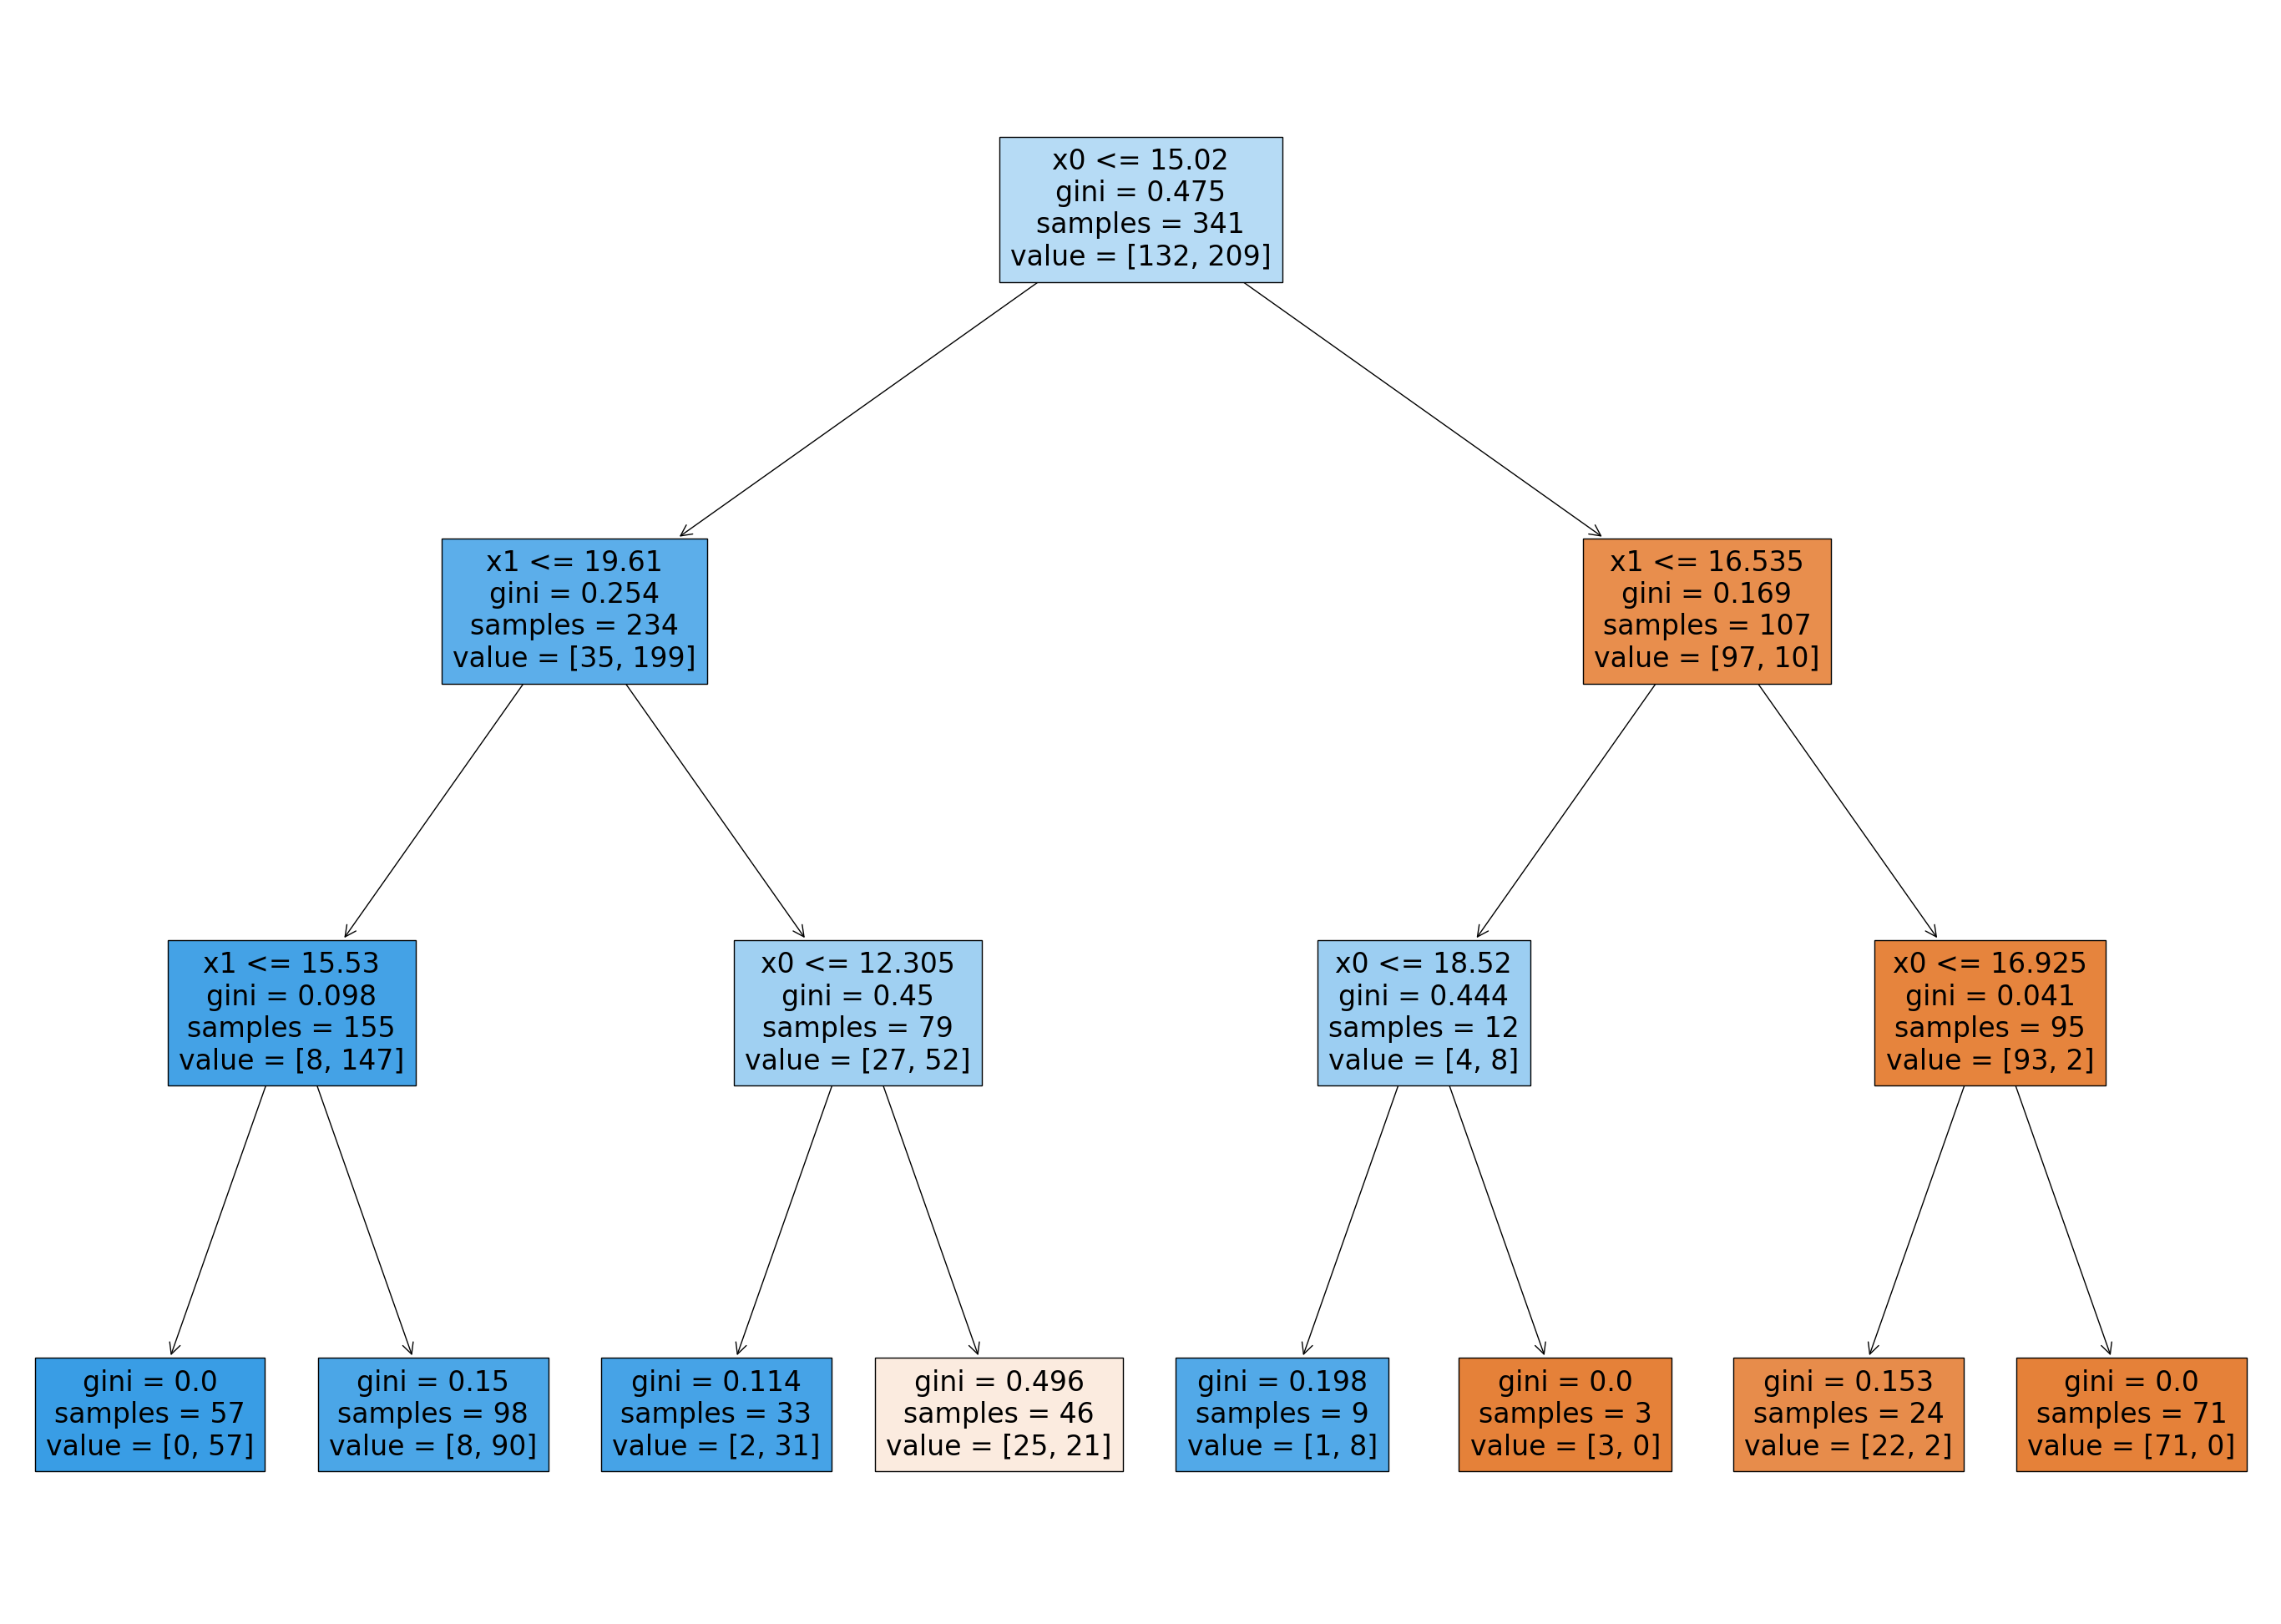

In [14]:
plt.figure(figsize=(35, 25))
plot_tree(model, feature_names=list(df.iloc[::, 0:2].columns), filled=True)

In [15]:
model.ccp_alpha

0.0

In [16]:
model.criterion

'gini'

In [22]:
print(model.get_params)

<bound method BaseEstimator.get_params of DecisionTreeClassifier(max_depth=3, random_state=42)>


In [27]:
print(model.feature_importances_[0] + model.feature_importances_[1])

1.0


In [58]:
df

,x0,x1,y
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0
...,...,...,...
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0


In [42]:
print(model.feature_importances_)

[0.92543026 0.07456974]


Text(0.5, 0, 'Feature Importance')

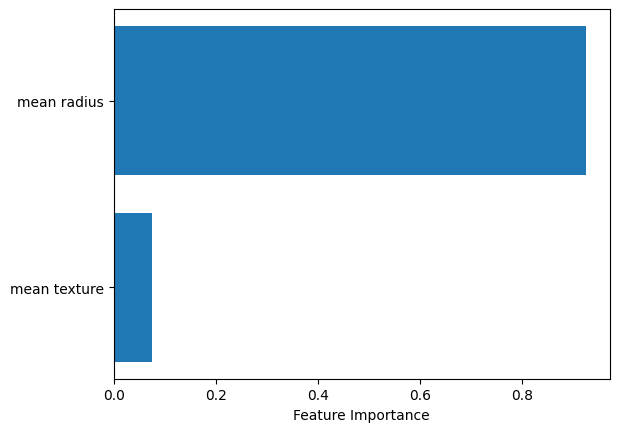

In [54]:
sort = model.feature_importances_.argsort()

plt.barh(datasets.load_breast_cancer().feature_names[sort], model.feature_importances_[sort])

plt.xlabel("Feature Importance")

In [60]:
datasets.load_breast_cancer().feature_names[sort]

array(['mean texture', 'mean radius'], dtype='<U23')

In [69]:
model.feature_importances_

array([0.92543026, 0.07456974])

In [70]:
model.feature_importances_.argsort()

array([1, 0], dtype=int64)

In [71]:
model.feature_importances_

array([0.92543026, 0.07456974])

In [85]:
d = datasets.load_breast_cancer()
d.data[13]

array([1.585e+01, 2.395e+01, 1.037e+02, 7.827e+02, 8.401e-02, 1.002e-01,
       9.938e-02, 5.364e-02, 1.847e-01, 5.338e-02, 4.033e-01, 1.078e+00,
       2.903e+00, 3.658e+01, 9.769e-03, 3.126e-02, 5.051e-02, 1.992e-02,
       2.981e-02, 3.002e-03, 1.684e+01, 2.766e+01, 1.120e+02, 8.765e+02,
       1.131e-01, 1.924e-01, 2.322e-01, 1.119e-01, 2.809e-01, 6.287e-02])

In [86]:
d.data[1]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])